In [2]:
import os
import sys
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import pandas as pd
from matplotlib.ticker import AutoMinorLocator, MaxNLocator, ScalarFormatter

# Configuración del directorio actual y del directorio de utilidades
current_dir = os.getcwd()
utilities_dir = os.path.join(current_dir, '../../utils')
sys.path.insert(0, utilities_dir)
from plotting import *  # Importar utilidades de trazado personalizadas

In [ ]:
# Leer los archivos CSV, especificando que el delimitador es una coma y saltar las primeras líneas
df_ml = pd.read_csv('Scopus-10-Analyze-Year-Machine-Learning.csv', skiprows=6, delimiter=',')
df_nm = pd.read_csv('Scopus-10-Analyze-Year - Numerical Methods.csv', skiprows=6, delimiter=',')
df_nm_ml = pd.read_csv('Scopus-10-Analyze-Year - Numerical Methods and Machine Learning.csv', skiprows=6, delimiter=',')
df_waves = pd.read_csv('Scopus-50-Analyze-Year-Waves.csv', skiprows=6, delimiter=',')
df_total = pd.read_csv('Scopus-50-Analyze-Year-Total.csv', skiprows=6, delimiter=',')

# Extraer los datos de las columnas
years_ml = df_ml.iloc[:, 0].tolist()
works_ml = df_ml.iloc[:, 1].tolist()
years_nm = df_nm.iloc[:, 0].tolist()
works_nm = df_nm.iloc[:, 1].tolist()
years_nm_ml = df_nm_ml.iloc[:, 0].tolist()
works_nm_ml = df_nm_ml.iloc[:, 1].tolist()
years_waves = df_waves.iloc[:, 0].tolist()
works_waves = df_waves.iloc[:, 1].tolist()
years_total = df_total.iloc[:, 0].tolist()
works_total = df_total.iloc[:, 1].tolist()


# Crear diccionarios de datos
data_ml = {
    'YEAR': years_ml,
    'WORKS': works_ml
}

data_nm = {
    'YEAR': years_nm,
    'WORKS': works_nm
}

data_nm_ml = {
    'YEAR': years_nm_ml,
    'WORKS': works_nm_ml
}

data_waves = {
    'YEAR': years_waves,
    'WORKS': works_waves
}

data_total = {
    'YEAR': years_total,
    'WORKS': works_total
}

# Crear diccionario de datos relativos
data_relative_ml = {
    'YEAR': data_ml['YEAR'],
    'WORKS': np.array(data_ml['WORKS']) / np.array(data_total['WORKS'])
}

data_relative_nm = {
    'YEAR': data_nm['YEAR'],
    'WORKS': np.array(data_nm['WORKS']) / np.array(data_total['WORKS'])
}


data_relative_nm_ml = {
    'YEAR': data_nm_ml['YEAR'],
    'WORKS': np.array(data_nm_ml['WORKS']) / np.array(data_total['WORKS'])
}

 
data_relative_waves = {
    'YEAR': data_waves['YEAR'],
    'WORKS': np.array(data_waves['WORKS']) / np.array(data_total['WORKS'])
}

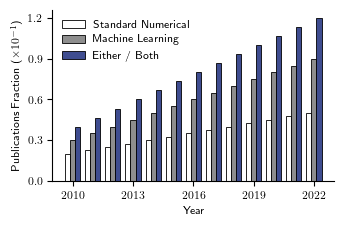

In [11]:
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator, ScalarFormatter
import numpy as np

# === Datos de ejemplo (reemplázalos con tus DataFrames reales) ===
years = np.arange(2010, 2023)
data_relative_nm = {'YEAR': years, 'WORKS': np.linspace(0.2, 0.5, len(years))}
data_relative_ml = {'YEAR': years, 'WORKS': np.linspace(0.3, 0.9, len(years))}
data_relative_nm_ml = {'YEAR': years, 'WORKS': np.linspace(0.4, 1.2, len(years))}

# === Colores y estilo ===
color_standard = 'none'      # solo contorno
edge_standard = 'black'
color_ml = '#8e8e8e'         # gris medio
color_either = '#3f4d90'     # azul oscuro
bar_width = 0.25

# === Configuración de la figura ===
width_in_inches = 90 / 25.4
height_in_inches = 60 / 25.4
fig, ax = plt.subplots(figsize=(width_in_inches, height_in_inches))

# === Posiciones desplazadas de las barras ===
years = np.array(data_relative_nm['YEAR'])
pos_std = years - bar_width
pos_ml = years
pos_either = years + bar_width

# === Barras ===
ax.bar(pos_std, data_relative_nm['WORKS'], width=bar_width,
       color=color_standard, edgecolor=edge_standard, linewidth=0.6,
       label='Standard Numerical')

ax.bar(pos_ml, data_relative_ml['WORKS'], width=bar_width,
       color=color_ml, edgecolor='black', linewidth=0.6,
       label='Machine Learning')

ax.bar(pos_either, data_relative_nm_ml['WORKS'], width=bar_width,
       color=color_either, edgecolor='black', linewidth=0.6,
       label='Either / Both')

# === Ejes y formato ===
ax.set_xlabel("Year")
ax.set_ylabel(r"Publications Fraction ($\times 10^{-1}$)")
ax.set_xticks([2010, 2013, 2016, 2019, 2022])
ax.yaxis.set_major_locator(MaxNLocator(nbins=5))
ax.yaxis.set_major_formatter(ScalarFormatter(useMathText=True))
ax.ticklabel_format(axis='y', style='sci', scilimits=(0, 0))
ax.tick_params(axis='both', colors='black')

# === Estética ===
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.legend(frameon=False)

plt.tight_layout()
plt.savefig("publications_three_bars.pdf", bbox_inches="tight")
plt.show()
